# Importing Libraries

In [ ]:
!pip install transformers pandas numpy datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

plt.style.use('ggplot')

# Importing Datasets

In [ ]:
# df = pd.read_csv('delhi.csv')
# df.head(5)

# Load Different Models

## Bert Models

In [ ]:
BertModelsName = {
    "Bertweet" : "finiteautomata/bertweet-base-sentiment-analysis",
    # "BBMUS" : "nlptown/bert-base-multilingual-uncased-sentiment",
    "BBMCCS" : "rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment",
    "BSA" : "Souvikcmsa/BERT_sentiment_analysis"
}

In [ ]:
BertModels = {}
for k,v in BertModelsName.items():
  tokenizer = AutoTokenizer.from_pretrained(v)
  model = AutoModelForSequenceClassification.from_pretrained(v)
  BertModels[k] = [tokenizer, model]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


## Roberta Models

In [ ]:
RobertaModelsName = {
    "TRBS" : "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "RBSM" : "cardiffnlp/xlm-roberta-base-sentiment-multilingual"
}

In [ ]:
RobertaModels = {}
for k,v in RobertaModelsName.items():
  tokenizer = AutoTokenizer.from_pretrained(v)
  model = AutoModelForSequenceClassification.from_pretrained(v)
  RobertaModels[k] = [tokenizer, model]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Distilbert Models

In [ ]:
DistilbertModelsName = {
    "DBUFTS" : "austinmw/distilbert-base-uncased-finetuned-tweets-sentiment",
    "DBMCS2" : "philschmid/distilbert-base-multilingual-cased-sentiment-2"
}

In [ ]:
DistilbertModel = {}
for k,v in DistilbertModelsName.items():
  tokenizer = AutoTokenizer.from_pretrained(v)
  model = AutoModelForSequenceClassification.from_pretrained(v)
  DistilbertModel[k] = [tokenizer, model]

# Predicting sentiments

In [ ]:
example = "you are good but, sometimes you just make me mad and I feel disgusted around you. Although you are a nice person, things like your attitude and behavior matter. Try to be a little more elegant than being bold and unethical."

In [ ]:
def plot_bar(result, name, n, pos):
  bar_title = name+" graph"
  scores = result[0][0].detach().numpy()
  scores_dict = {
      'negative' : float(scores[0]),
      'neutral' : float(scores[1]),
      'positive' : float(scores[2])
  }
  plt.subplot(1,n,pos)
  dict_df = pd.DataFrame(scores_dict.items())
  ax = sns.barplot(x=0, y=1, data=dict_df)
  ax.set(xlabel = 'labels', ylabel='rating', title=bar_title)

### Bert models sentiments

for Bertweet result = tensor([[ 2.8944, -0.6108, -2.5958]], grad_fn=<AddmmBackward0>) 


for BBMCCS result = tensor([[-0.9058, -1.9359,  2.8825]], grad_fn=<AddmmBackward0>) 


for BSA result = tensor([[-0.8953,  0.6445, -0.7805]], grad_fn=<AddmmBackward0>) 




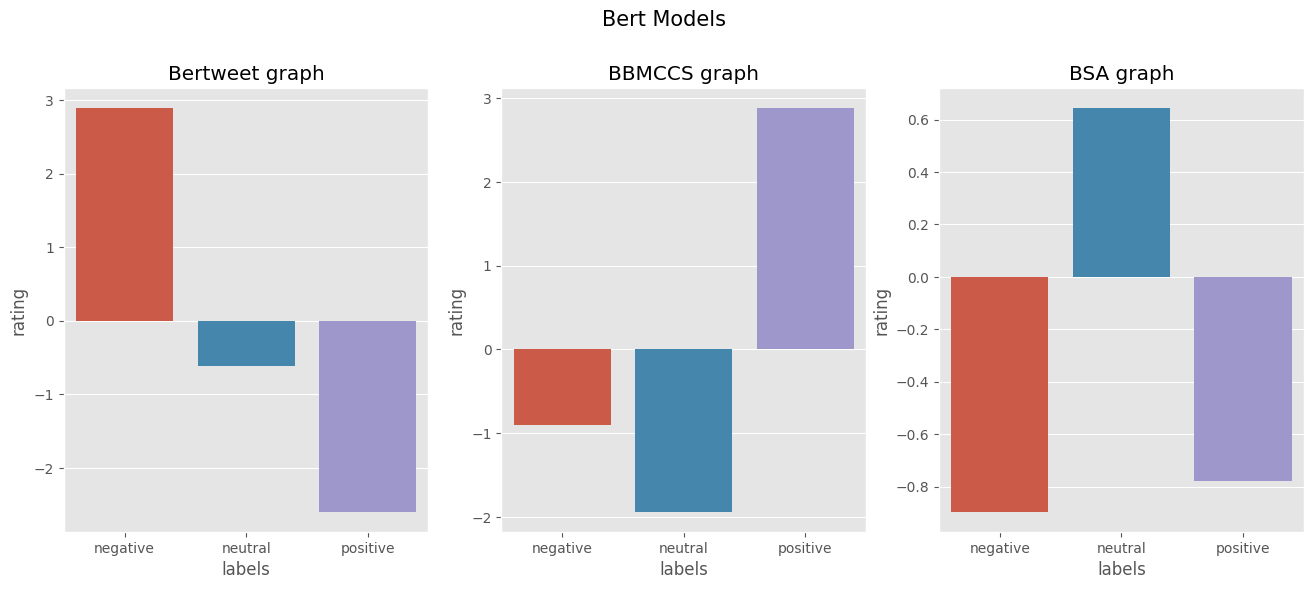

In [ ]:
cnt = 0
l = len(BertModels)
fig = plt.figure(figsize =(16,6))
fig.subplots_adjust(hspace=0.4, top=0.85)
fig.suptitle("Bert Models",fontsize=15)
for k,v in BertModels.items():
  tokens = v[0].encode(example[:158],  return_tensors='pt')
  result = v[1](tokens)
  print(f'for {k} result = {result.logits} \n\n')
  cnt+=1
  plot_bar(result, k, l, cnt)

### Roberta models sentiment 

for TRBS result = tensor([[ 1.9236, -0.0548, -2.1758]], grad_fn=<AddmmBackward0>) 


for RBSM result = tensor([[ 2.0267, -0.6191, -1.0694]], grad_fn=<AddmmBackward0>) 




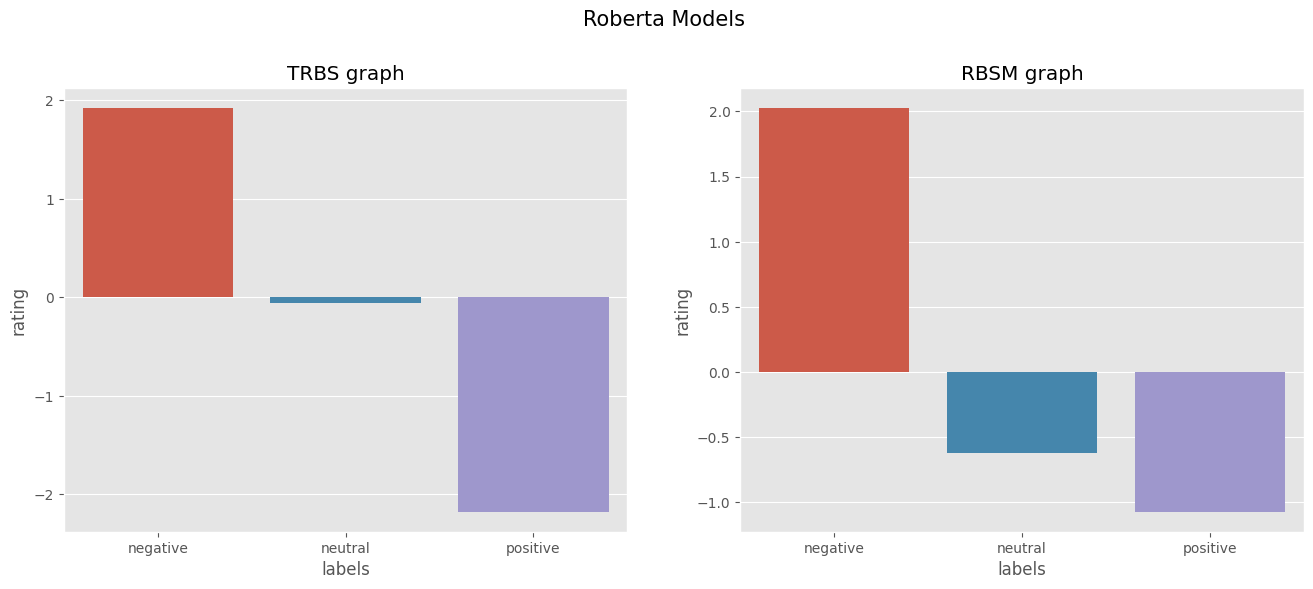

In [ ]:
cnt = 0
l = len(RobertaModels)
fig = plt.figure(figsize =(16,6))
fig.subplots_adjust(hspace=0.4, top=0.85)
fig.suptitle("Roberta Models",fontsize=15)
for k,v in RobertaModels.items():
  tokens = v[0].encode(example,  return_tensors='pt')
  result = v[1](tokens)
  print(f'for {k} result = {result.logits} \n\n')
  cnt+=1
  plot_bar(result, k, l, cnt)

### Distilbert models

for DBUFTS result = tensor([[ 1.0529, -0.1011, -0.9684]], grad_fn=<AddmmBackward0>) 


for DBMCS2 result = tensor([[-1.2611,  0.2902,  0.8977]], grad_fn=<AddmmBackward0>) 




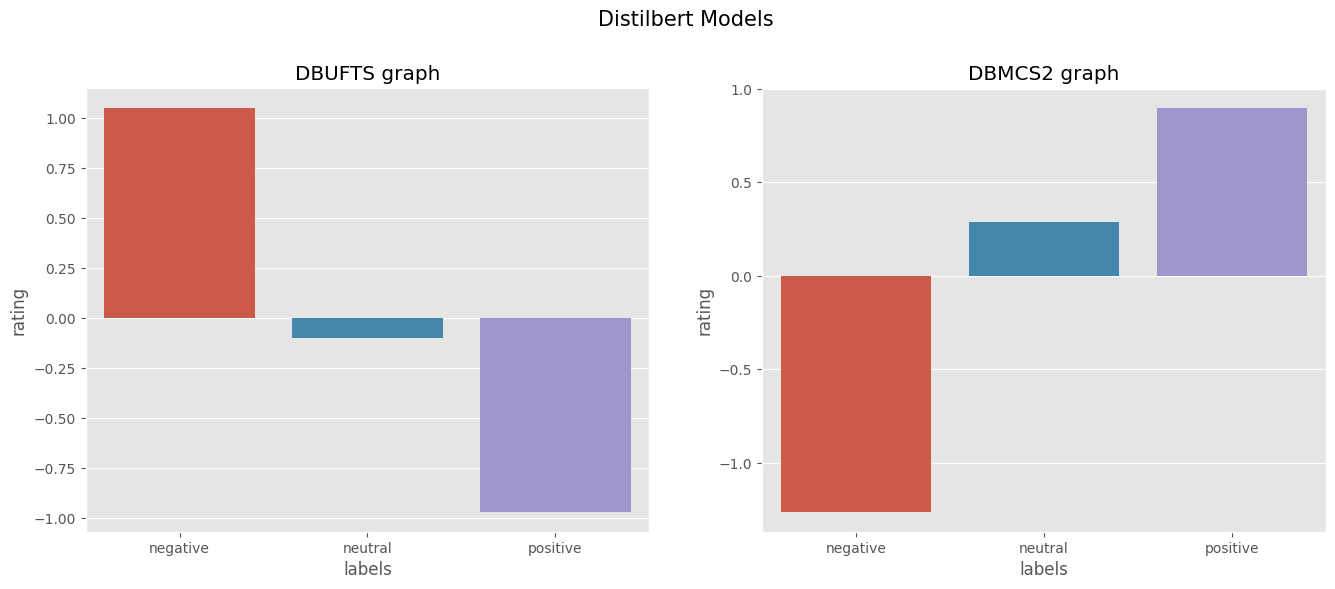

In [ ]:
cnt = 0
l = len(DistilbertModel)
fig = plt.figure(figsize =(16,6))
fig.subplots_adjust(hspace=0.4, top=0.85)
fig.suptitle("Distilbert Models",fontsize=15)
for k,v in DistilbertModel.items():
  tokens = v[0].encode(example,  return_tensors='pt')
  result = v[1](tokens)
  print(f'for {k} result = {result.logits} \n\n')
  cnt+=1
  plot_bar(result, k, l, cnt)